***Spring 2017 Data Bootcamp Final Project by Colleen Jin dj928, Yingying Chen yc1875***
# Analysis On Relation Between News Sentiment And Market Portfolio


![title](titlepic3.png)

**In this project, we use two sets of data to draw insights on how media sentiment can be an indicator for the financial sector. For the financial data, we plan to use daily return of the market index <font color='green'>(^GSPC)</font>, which is a good indicator for market fluctuation; for media sentiment, we use summarized information of news pieces from top 10 most popular press because of their stronger influence in shaping people's perception of events that are happening in the world.**

**Both sets of data are real-time, which means the source files are of the moment and need to be loaded each time analysis is performed. The sentiment analysis library returns a <font color='green'>polarity</font> score (-1.0 to 1.0) and a <font color='green'>polarity</font> score (0.0 to 1.0) on the news stories. Using quantified sentiment analysis, we juxtapose the two time series of data and observe if they present any correlation and search for potential causality. For example, we may test the hypothesis that when polarity among the daily news posts is higher (a.k.a., positive), the financial market that same day is more likely to rise. The rest of the notebook is a step-by-step instruction.**

### Modules used in this notebook:
1. **[TextBlob](https://textblob.readthedocs.io/en/dev/): its library provides an API for common natural language processing <font color='green'>(NLP)</font> tasks, including part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, etc.**
2. **[Non-Parametric Regression](http://pythonhosted.org/PyQt-Fit/NonParam_tut.html): a category of regression analysis in which the predictor does not take a predetermined form but is constructed according to information derived from the data.**
3. **[WordCloud](https://pypi.python.org/pypi/wordcloud)**

### Data sources: 
1. **[News API](https://newsapi.org/): We use a news api provided by [NewsAPI.org](https://newsapi.org/) to load real-time news headlines (in the form of JSON metadata), then apply methods mainly from Python's [TextBlob](https://textblob.readthedocs.io/en/dev/) module to conduct sentiment analysis. We seleced 10 publish houses by their popularity (please see the ranking of news press [here](http://www.ebizmba.com/articles/news-websites))**.
2. **[S&P 500](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC) index open and closing price derived from Yahoo Finance**.

In [69]:
%matplotlib inline                     
# import necessary packages
import pandas as pd                    
import matplotlib.pyplot as plt        
from pandas_datareader import data
from datetime import datetime
import numpy as np
from textblob import TextBlob
import csv

from wordcloud import WordCloud,ImageColorGenerator
#from scipy.misc import imread
import string

# PART 1: NEWS COLLECTION - pd.read_json()
**We use <font color='green'>pd.read_json()</font> to import real-time news information (top 10 posts from each publisher). These news items are stored separately as dataframes and combined into one collective dataframe. (News API powered by [NewsAPI.org](https://newsapi.org/)**)**

**The news press consists of **
* [CNN](http://www.cnn.com/), 
* [The New York Times](https://www.nytimes.com/), 
* [Washington Post](https://www.washingtonpost.com/), 
* [BBC News](http://www.bbc.com/news), 
* [ABC News](http://abcnews.go.com/),
* [Financial Times](https://www.ft.com/),
* [Bloomberg](https://www.bloomberg.com/).

In [70]:
cnn = pd.read_json('https://newsapi.org/v1/articles?source=cnn&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
nyt= pd.read_json('https://newsapi.org/v1/articles?source=the-new-york-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
wsp=pd.read_json('https://newsapi.org/v1/articles?source=the-washington-post&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518')
bbc=pd.read_json("https://newsapi.org/v1/articles?source=bbc-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
abc=pd.read_json("https://newsapi.org/v1/articles?source=abc-news-au&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
#google = pd.read_json(" https://newsapi.org/v1/articles?source=google-news&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
ft = pd.read_json("https://newsapi.org/v1/articles?source=financial-times&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
bloomberg = pd.read_json("https://newsapi.org/v1/articles?source=bloomberg&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
economist = pd.read_json("https://newsapi.org/v1/articles?source=the-economist&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")
wsj = pd.read_json("https://newsapi.org/v1/articles?source=the-wall-street-journal&sortBy=top&apiKey=bdc0623102e94a7586137f02a51e0518")

In [71]:
total = [wsj, cnn, nyt, wsp, bbc, abc, ft, bloomberg, economist]
total1 = pd.concat(total, ignore_index=True)
total1

,articles,sortBy,source,status
0,{'title': 'James Comey Sought More Resources f...,top,the-wall-street-journal,ok
1,{'title': 'Trump Fires FBI Director James Come...,top,the-wall-street-journal,ok
2,{'title': 'Comey Firing Casts Harsh Spotlight ...,top,the-wall-street-journal,ok
3,"{'title': 'As the FBI Reels, Candidates Emerge...",top,the-wall-street-journal,ok
4,{'title': 'Trump’s Firing of Comey Fans Partis...,top,the-wall-street-journal,ok
5,{'title': 'Donald Trump Seeks to Mute Outcry f...,top,the-wall-street-journal,ok
6,{'title': 'Senate Committee Subpoenas Document...,top,the-wall-street-journal,ok
7,{'title': 'Snapchat Parent Posts $2.2 Billion ...,top,the-wall-street-journal,ok
8,{'title': 'U.S. to Expand Intelligence Coopera...,top,the-wall-street-journal,ok
9,{'title': 'Whole Foods Overhauls Board; Vows B...,top,the-wall-street-journal,ok


**Some values may be missing in the <font color='green'>article</font> column. For example, if there is no imformation of the key <font color='green'>author</font> of news pieces from BBC, it will indicates <font color='green'>None</font> where the <font color='green'>author</font> information should have been. Therefore, we need to convert <font color='green'>Nonetype</font> entries to string type, because the <font color='green'>.append()</font> method for a <font color='green'>list</font> cannot pass values of <font color='green'>Nonetype</font>. We will use <font color='green'>.append()</font> method later for displaying sentiment analysis results.**

In [72]:
k = 0
while k < len(total1):
    if total1['articles'][k]['description'] is None:
        total1['articles'][k]['description'] = 'None'
    k += 1

j = 0
while j < len(total1):
    print(type(total1['articles'][j]['description']))
    j += 1
# now all entries are of type string, regardless whether there is real contents.

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [73]:
l = 0
while l < len(total1):
    if total1['articles'][l]['title'] is None:
        total1['articles'][l]['title'] = 'None'
    l += 1

p = 0
while p < len(total1):
    print(type(total1['articles'][p]['title']))
    p += 1
# now all entries are of type string, regardless whether there is real contents.

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

**Contents of the column named <font color='green'>articles</font> are of <font color='green'>dict</font> type; each row contains information including <font color='green'>author</font>, <font color='green'>title</font>, <font color='green'>description</font>, <font color='green'>url</font>, <font color='green'>urlToImage</font> and <font color='green'>publishedAt</font>, among which <font color='green'>title</font> is selected for main analysis.**

In [74]:
# write the news posts into a new .csv file
n_rows = len(total1.index)
articles = total1['articles']
result = csv.writer(open('result.csv','a'))
result.writerow(['PublishedAt','Title','description'])
for i in range(0,n_rows): 
    line = [articles[i]['publishedAt'],articles[i]['title'],articles[i]['description']]
    result.writerow(line)

# print the first item in the 'articles' series as an example.
articles[0]

{'author': 'Kristina Peterson',
 'description': 'Former Federal Bureau of Investigation Director James Comey asked the Justice Department last week for more resources for the agency’s investigation into Russian interference in the 2016 election, a U.S. official said.',
 'publishedAt': '2017-05-10T16:17:00Z',
 'title': 'James Comey Sought More Resources for FBI’s Russia Probe Before Being Fired',
 'url': 'https://www.wsj.com/articles/james-comey-had-requested-more-money-for-fbi-s-russia-investigation-before-being-fired-u-s-official-1494433061',
 'urlToImage': 'https://si.wsj.net/public/resources/images/BN-TJ559_TRUMPC_TOP_20170510115539.jpg'}

In [75]:
# type of each entry in the 'articles' column is 'dict'
type(articles[0])

dict

In [76]:
# keys of the 'dict' variables are 'author', 'publishedAt', 'urlToImage', 'description', 'title', 'url'
articles[0].keys()

dict_keys(['title', 'author', 'description', 'url', 'urlToImage', 'publishedAt'])

** The <font color='green'>tags</font> method performs part-of-speech tagging (for example, <font color='green'>NNP</font> stands for a singular proper noun).**

In [77]:
blob = TextBlob(str(articles[0]['title']))
blob.tags

[('James', 'NNP'),
 ('Comey', 'NNP'),
 ('Sought', 'NNP'),
 ('More', 'NNP'),
 ('Resources', 'NNPS'),
 ('for', 'IN'),
 ('FBI’s', 'NNP'),
 ('Russia', 'NNP'),
 ('Probe', 'NNP'),
 ('Before', 'IN'),
 ('Being', 'NNP'),
 ('Fired', 'VBD')]

**A loop prints all the news titles, which are later used for sentiment analysis.**

In [78]:
i = 0
while i < n_rows:
    blob = TextBlob(articles[i]['title'])
    print(1 + i, ". ", blob, sep = "")
    i += 1

1. James Comey Sought More Resources for FBI’s Russia Probe Before Being Fired
2. Trump Fires FBI Director James Comey: Live Coverage of the Fallout
3. Comey Firing Casts Harsh Spotlight on Rod Rosenstein
4. As the FBI Reels, Candidates Emerge to Run Agency
5. Trump’s Firing of Comey Fans Partisan Flames in Congress
6. Donald Trump Seeks to Mute Outcry from Firing of James Comey
7. Senate Committee Subpoenas Documents from Mike Flynn in Russia Probe
8. Snapchat Parent Posts $2.2 Billion Loss in First Quarterly Report; Stock Plunges
9. U.S. to Expand Intelligence Cooperation With Turkey
10. Whole Foods Overhauls Board; Vows Big Changes
11. 4 ways Trump miscalculated the Comey firing
12. Source close to Comey says there were 2 reasons the FBI director was fired
13. Tapper: The real reasons Trump fired Comey - CNN Video
14. First on CNN: Comey sends farewell letter to friends and agents
15. WH: Comey tossed 'stick of dynamite' into DOJ - CNN Video
16. Comey committed 'atrocities,' Sarah H

**All descriptions for the 100 news posts are printed in the same way as above; their presence is useful for adding accuracy for our sentiment analysis by providing more words on the same topic as the titles.**

In [79]:
j = 0
while j < n_rows:
    blob1 = TextBlob(str(articles[j]['description']))
    print(1 + j, ". ", blob1, sep = "")
    j += 1

1. Former Federal Bureau of Investigation Director James Comey asked the Justice Department last week for more resources for the agency’s investigation into Russian interference in the 2016 election, a U.S. official said.
2. Trump Fires FBI Director James Comey: Live Coverage of the Fallout
3. The firing of James Comey has cast a harsh spotlight on Deputy Attorney General Rod Rosenstein, who is less than two weeks into a job that he reached with bipartisan Senate support.
4. The Justice Department moved on Wednesday to find a temporary successor for fired FBI Director James Comey, as Attorney General Jeff Sessions and his top deputy interviewed five candidates amid continuing fallout over the controversial dismissal.
5. President Trump’s firing of FBI Director James Comey thrust a debate over the appointment of a special prosecutor to the forefront of the Senate’s agenda, complicating an already halting effort to pass a health-care bill and craft a tax overhaul this year.
6. President 

# PART 2: WORD CLOUD

**A word cloud of news tiltles can provide us with a direct and vivid impression of the most frequently discussed topics in today's news reports. Topic/person/event that prevails among the top news pieces appears in the largest font, occupies the center space and displays the most salient colors.**

**In a visually pleasant way, a word cloud gives us a hint for the news sentiment of the day.**
#### Code referred to https://github.com/amueller/word_cloud/blob/master/examples/simple.py

In [80]:
#write the csv file into a txt file called entire_text.txt
contents = csv.reader(open('result.csv','r'))
texts = open('entire_text.txt','w')
list_of_text = []
for row in contents:
    line = row[2].encode('utf-8')
    line = str(line.decode())
    list_of_text.append(line)
texts.writelines(list_of_text)

In [81]:
text=open("entire_text.txt",'r')
text=text.read()
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

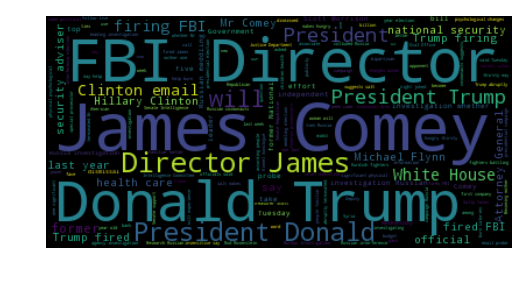

In [82]:
#display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

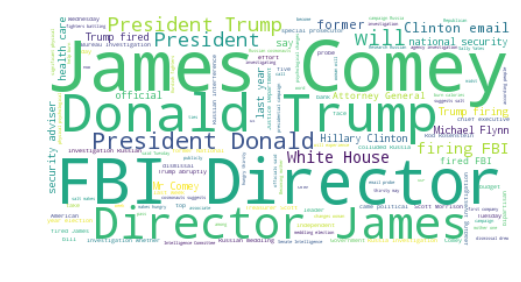

In [83]:
# increase max_font_size and change backgroud color to white 
wordcloud = WordCloud(max_font_size=40).generate(text)
wordcloud = WordCloud(max_words=200,background_color='white',max_font_size=100).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# PART 3: SENTIMENT ANALYSIS
**We use <font color='green'>.sentiment</font> method from <font color='green'>TextBlob</font> to calculate polatiry and subjectivity of each <font color='green'>title</font>.
The <font color='green'>sentiment</font> property returns an output in the form of <font color='green'>namedtuple</font> (`Sentiment(polarity, subjectivity)`). The polarity score is a float within the range `[-1.0, 1.0]`. The subjectivity is a float within the range `[0.0, 1.0]` where `0.0` is very objective and `1.0` is very subjective.**

In [84]:
# a loop to show sentiment analysis results of the 100 titles
n = 0
while n < n_rows:
    print(TextBlob(articles[n]['title']).sentiment)
    n += 1

Sentiment(polarity=0.5, subjectivity=0.5)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=-0.2, subjectivity=0.7)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.1, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.2, subjectivity=0.30000000000000004)
Sentiment(polarity=0.25, subjectivity=0.3333333333333333)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.5, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.21666666666666665, subjectivity=0.36666666666666664)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=

**From the TextBlob module, the <font color='green'>.sentiment</font> method returns results in the form of <font color='green'>namedtuples</font>. Elements in <font color='green'>namedtuples</font> can only be printed after being appended into the form of a <font color='green'>list</font>. Therefore, we use a <font color='green'>list</font> named <font color='green'>tests_title</font> to store all the results from our sentiment tests on the news titles.**

In [85]:
N = 0
tests_title = []

while N < n_rows:
    tests_title.append(TextBlob(articles[N]['title']).sentiment)
    N += 1

**We create a list named <font color='green'>list_polarity_title</font> to store polarity scores for news titles.**

In [86]:
list_polarity_title = [] # this list contains all titles polarity scores.

for test in tests_title:
    list_polarity_title.append(test.polarity) 

** Similarly, we create a list of subjectivity scores for news titles.**

In [87]:
list_subjectivity_title = [] # this list contains all titles subjectivity scores.

for test in tests_title:
    list_subjectivity_title.append(test.subjectivity)

### 'description'

**We use <font color='green'>.sentiment</font> method again to calculate <font color='green'>polarity</font> and <font color='green'>subjectivity</font> of each <font color='green'>description</font>. As mentioned above, analysis on descritions make the final results more versatile and hopefully more accurate.**

In [88]:
m = 0
while m < n_rows:
    print(TextBlob(articles[m]['description']).sentiment)
    m += 1

Sentiment(polarity=0.125, subjectivity=0.14166666666666666)
Sentiment(polarity=0.13636363636363635, subjectivity=0.5)
Sentiment(polarity=-0.10555555555555556, subjectivity=0.4222222222222222)
Sentiment(polarity=0.3666666666666667, subjectivity=0.65)
Sentiment(polarity=0.35714285714285715, subjectivity=0.5714285714285714)
Sentiment(polarity=0.25, subjectivity=0.3)
Sentiment(polarity=-0.15, subjectivity=0.3)
Sentiment(polarity=0.125, subjectivity=0.19999999999999998)
Sentiment(polarity=0.275, subjectivity=0.425)
Sentiment(polarity=0.05, subjectivity=0.25833333333333336)
Sentiment(polarity=0.02500000000000001, subjectivity=0.25)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.15)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.14166666666666666, subjectivity=0.5083333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.012500000000000011, subjectivity=0.4)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0,

In [89]:
M = 0
tests_description = []

while M < n_rows:
    tests_description.append(TextBlob(articles[M]['description']).sentiment)
    M += 1

**We create a list of polarity scores for news descriptions by appending each polarity score to the list named <font color='green'>list_polarity_description</font>.**

In [90]:
list_polarity_description = [] # this list contains all descriptions' polarity scores.

for test in tests_description:
    list_polarity_description.append(test.polarity)

**Same as above, we create a list of subjectivity for news descriptions.**

In [91]:
list_subjectivity_description = [] # this list contains all descriptions' subjectivity scores.

for test in tests_description:
    list_subjectivity_description.append(test.subjectivity)

**Now we have four lists of data:**
1. list_polarity_title
2. list_subjectivity_title
3. list_polarity_description
4. list_subjectivity_description

**We convert the four lists of data into one dataframe for drawing plots.**

In [92]:
total_score = [list_polarity_title, list_subjectivity_title, list_polarity_description, list_subjectivity_description]
labels = ['T_polarity', 'T_subjectivity', 'D_polarity', 'D_subjectivity']
df = pd.DataFrame.from_records(total_score, index = labels)
df

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
T_polarity,0.500000,0.136364,-0.200000,0.000000,0.000000,0.00,0.00,0.250000,0.000,0.100000,...,0.0,-0.125,0.30,-0.10,-0.300000,-0.500000,0.00,0.0,0.55,0.0
T_subjectivity,0.500000,0.500000,0.700000,0.000000,0.000000,0.00,0.00,0.333333,0.000,0.250000,...,0.0,1.000,0.20,0.15,0.433333,0.300000,0.25,0.0,0.95,0.0
D_polarity,0.125000,0.136364,-0.105556,0.366667,0.357143,0.25,-0.15,0.125000,0.275,0.050000,...,0.0,0.000,0.75,-0.20,0.525000,0.158333,0.00,0.4,0.00,0.5
D_subjectivity,0.141667,0.500000,0.422222,0.650000,0.571429,0.30,0.30,0.200000,0.425,0.258333,...,0.0,0.000,0.75,0.30,0.775000,0.766667,0.30,0.7,0.00,0.5


**We transpose the dataframe to make it compatible with the .plot() method.**

In [93]:
df = df.transpose() 
df

,T_polarity,T_subjectivity,D_polarity,D_subjectivity
0,0.500000,0.500000,0.125000,0.141667
1,0.136364,0.500000,0.136364,0.500000
2,-0.200000,0.700000,-0.105556,0.422222
3,0.000000,0.000000,0.366667,0.650000
4,0.000000,0.000000,0.357143,0.571429
5,0.000000,0.000000,0.250000,0.300000
6,0.000000,0.000000,-0.150000,0.300000
7,0.250000,0.333333,0.125000,0.200000
8,0.000000,0.000000,0.275000,0.425000
9,0.100000,0.250000,0.050000,0.258333


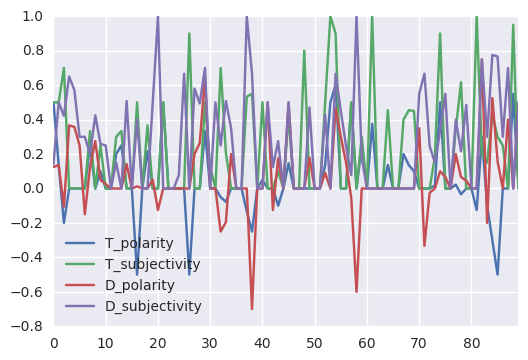

In [94]:
# this plot shows scores for all 100 news posts.
df.plot()

## -Analysis by news press
**Apparently, the 100 news posts standing alone aren't of much information. For a better perspective, we need to group scores by the press they belong to, under the assumption that posts from the same press are much more likely to embed a uniform tone. We create a list names <font color='green'>new_T_polarity</font> to store the sum of polarity scores of news titles for each press. The we do the same operation on subjectivity scores.**

In [95]:
c_T_polarity = df['T_polarity']
new_T_polarity = []
B = 0
C = 0
while B < n_rows:
    sum = 0
    while C < B + 10:
        sum += c_T_polarity[C]
        C += 1
    new_T_polarity.append(sum)
    B += 10
new_T_polarity
# The press are in the order as: wsj, cnn, nyt, wsp, bbc, abc, google, ft, bloomberg and economist.

[0.78636363636363626,
 0.16666666666666666,
 0.33333333333333331,
 -0.51111111111111107,
 0.096590909090909116,
 1.9863636363636363,
 0.94772727272727275,
 0.50555555555555565,
 -0.17499999999999993]

In [96]:
c_T_subjectivity = df['T_subjectivity']
new_T_subjectivity = []
D = 0
E = 0
while D < n_rows:
    sum = 0
    while E < D + 10:
        sum += c_T_subjectivity[E]
        E += 1
    new_T_subjectivity.append(sum)
    D += 10
new_T_subjectivity

[2.2833333333333332,
 1.5,
 1.8999999999999999,
 2.115277777777778,
 1.8261363636363637,
 3.1999999999999997,
 2.7590909090909093,
 2.0444444444444443,
 3.2833333333333332]

In [97]:
c_D_polarity = df['D_polarity']
new_D_polarity = []
F = 0
G = 0
while F < n_rows:
    sum = 0
    while G < F + 10:
        sum += c_D_polarity[G]
        G += 1
    new_D_polarity.append(sum)
    F += 10
new_D_polarity

[1.4296176046176046,
 0.22916666666666671,
 0.98999999999999999,
 -0.94583333333333308,
 1.2291666666666667,
 0.35202020202020201,
 0.0,
 0.47045454545454546,
 2.1333333333333337]

In [98]:
c_D_subjectivity = df['D_subjectivity']
new_D_subjectivity = []
H = 0
I = 0
while H < n_rows:
    sum = 0
    while I < H + 10:
        sum += c_D_subjectivity[I]
        I += 1
    new_D_subjectivity.append(sum)
    H += 10
new_D_subjectivity

[3.7686507936507936,
 1.8083333333333336,
 3.518015873015873,
 3.2749999999999999,
 1.8708333333333331,
 3.0467532467532465,
 0.0,
 3.597943722943723,
 4.0916666666666668]

In [99]:
total_score_bypublishhouse = [new_T_polarity, new_T_subjectivity, new_D_polarity, new_D_subjectivity]
df1 = pd.DataFrame.from_records(total_score_bypublishhouse, index = labels)
df1

,0,1,2,3,4,5,6,7,8
T_polarity,0.786364,0.166667,0.333333,-0.511111,0.096591,1.986364,0.947727,0.505556,-0.175000
T_subjectivity,2.283333,1.500000,1.900000,2.115278,1.826136,3.200000,2.759091,2.044444,3.283333
D_polarity,1.429618,0.229167,0.990000,-0.945833,1.229167,0.352020,0.000000,0.470455,2.133333
D_subjectivity,3.768651,1.808333,3.518016,3.275000,1.870833,3.046753,0.000000,3.597944,4.091667


In [100]:
# change the column labels to press house.
new_columns = ['wsj', 'cnn', 'nyt', 'wsp', 'guardian', 'abc', 'ft', 'bloomberg', 'economist']
df1.columns = new_columns
df1

,wsj,cnn,nyt,wsp,guardian,abc,ft,bloomberg,economist
T_polarity,0.786364,0.166667,0.333333,-0.511111,0.096591,1.986364,0.947727,0.505556,-0.175000
T_subjectivity,2.283333,1.500000,1.900000,2.115278,1.826136,3.200000,2.759091,2.044444,3.283333
D_polarity,1.429618,0.229167,0.990000,-0.945833,1.229167,0.352020,0.000000,0.470455,2.133333
D_subjectivity,3.768651,1.808333,3.518016,3.275000,1.870833,3.046753,0.000000,3.597944,4.091667


### Graph for scores by news press

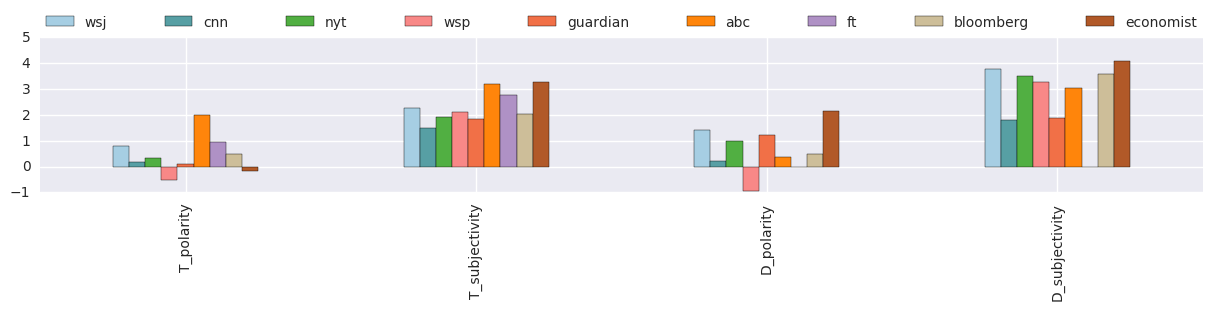

In [101]:
#colors = [(x/10.0, x/20.0, 0.75) for x in range(n_rows)]

df1.plot(kind = 'bar', legend = True, figsize = (15, 2), colormap='Paired', grid = True)

# place the legend above the subplot and use all the expended width.
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=10, mode="expand", borderaxespad=0.)

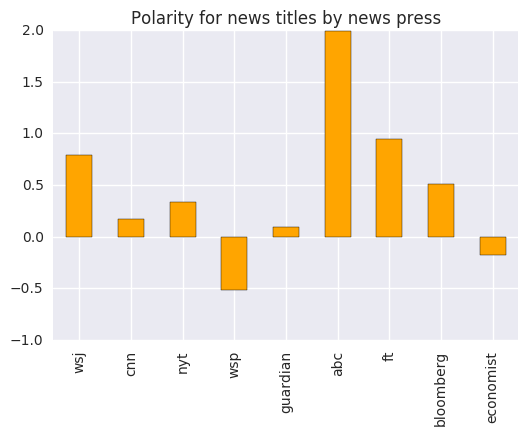

In [102]:
bar_color = 'orange'

row = df1.iloc[0]
row.plot(kind = 'bar', title = "Polarity for news titles by news press", color = bar_color, grid = True)

## -Analysis by date
**We have loaded news titles and descriptions over 2 weeks and stored them in a csv file called all_news.csv. We then calculated an average news polarity score for each day. We then then graph news polarity score to see how it has changed over time.**

In [103]:
contents = csv.reader(open('all_news.csv','r', encoding = "ISO-8859-1"))
result = csv.writer(open('entire_result.csv','w'))

In [104]:
result.writerow(['Date','polarity'])   
for row in contents:
    comment = row[2]  
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity
    line = [row[0],polarity]
    result.writerow(line)   

In [105]:
data = pd.read_csv('entire_result.csv')
data

,Date,polarity
0,3/24/17,-0.046528
1,3/24/17,-0.046528
2,4/9/17,0.000000
3,4/11/17,-0.250000
4,4/11/17,0.078571
5,4/12/17,0.000000
6,4/12/17,-0.400000
7,4/12/17,0.000000
8,4/12/17,0.250000
9,4/12/17,0.000000


In [106]:
#group the data by date
data=data.groupby('Date', as_index=False)['polarity'].mean()  
#convert column "Date" to a date data type 
data['Date'] = pd.to_datetime(data['Date'])
#sort the data by date ascending
data=data.sort_values(by="Date", axis=0, ascending=True, inplace=False, kind='quicksort')
data

,Date,polarity
0,2017-03-24,-0.046528
10,2017-04-09,0.000000
1,2017-04-11,-0.085714
2,2017-04-12,-0.019444
3,2017-04-13,0.041044
4,2017-04-14,0.032893
5,2017-04-15,0.035714
6,2017-04-27,-0.021875
7,2017-04-28,0.077340
8,2017-04-29,0.006742


### Graph for scores by date

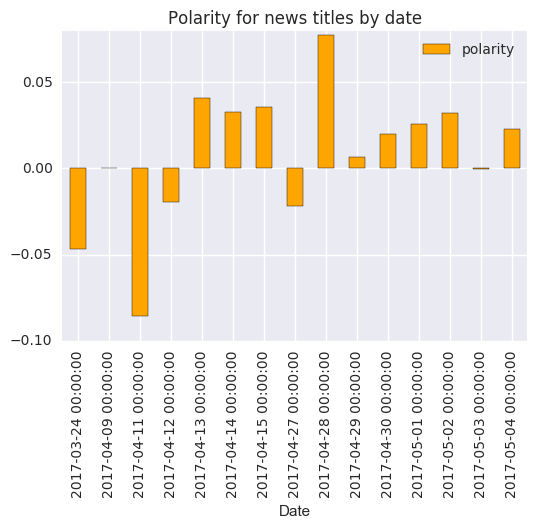

In [107]:
data.plot(x=data["Date"],kind = 'bar',title='Polarity for news titles by date',grid = True, color = 'orange')

# Part 4: S&P 500 INDEX
**Using the <font color='green'>yahoo_finance</font> module in Python, we will eventually compare the sentiment analysis of the news posts with the movement of the market index.**

In [108]:
from yahoo_finance import Share

# '^GSPC' is the market symble for S&P 500 Index
yahoo = Share('^GSPC')
print(yahoo.get_open())

2401.58


In [109]:
print(yahoo.get_price())

2396.92


In [110]:
print(yahoo.get_trade_datetime())

2017-05-09 20:38:00 UTC+0000


In [111]:
from pprint import pprint
pprint(yahoo.get_historical('2017-04-09', '2017-05-09'))

[{'Adj_Close': '2396.919922',
  'Close': '2396.919922',
  'Date': '2017-05-09',
  'High': '2403.870117',
  'Low': '2392.439941',
  'Open': '2401.580078',
  'Symbol': '%5eGSPC',
  'Volume': '3653590000'},
 {'Adj_Close': '2399.379883',
  'Close': '2399.379883',
  'Date': '2017-05-08',
  'High': '2401.360107',
  'Low': '2393.919922',
  'Open': '2399.939941',
  'Symbol': '%5eGSPC',
  'Volume': '3429440000'},
 {'Adj_Close': '2399.290039',
  'Close': '2399.290039',
  'Date': '2017-05-05',
  'High': '2399.290039',
  'Low': '2389.379883',
  'Open': '2392.370117',
  'Symbol': '%5eGSPC',
  'Volume': '3540140000'},
 {'Adj_Close': '2389.52002',
  'Close': '2389.52002',
  'Date': '2017-05-04',
  'High': '2391.429932',
  'Low': '2380.350098',
  'Open': '2389.790039',
  'Symbol': '%5eGSPC',
  'Volume': '4362540000'},
 {'Adj_Close': '2388.129883',
  'Close': '2388.129883',
  'Date': '2017-05-03',
  'High': '2389.820068',
  'Low': '2379.75',
  'Open': '2386.50',
  'Symbol': '%5eGSPC',
  'Volume': '3893

**We create a .csv file called yahoo.csv to store the financial data upon each import.**

In [119]:
from yahoo_finance import Share
yahoo = Share('^GSPC')
dataset = yahoo.get_historical('2017-04-27','2017-05-09')
result = csv.writer(open('yahoo.csv','w'))
result.writerow(['Date','Low','High'])
for i in range(0,len(dataset)):
    line = [dataset[i]['Date'],dataset[i]['Low'],dataset[i]['High']]
    result.writerow(line)

In [120]:
yahoo = pd.read_csv('yahoo.csv')
yahoo

,Date,Low,High
0,2017-05-09,2392.439941,2403.870117
1,2017-05-08,2393.919922,2401.360107
2,2017-05-05,2389.379883,2399.290039
3,2017-05-04,2380.350098,2391.429932
4,2017-05-03,2379.750000,2389.820068
5,2017-05-02,2385.820068,2392.929932
6,2017-05-01,2384.830078,2394.489990
7,2017-04-28,2382.360107,2393.679932
8,2017-04-27,2382.679932,2392.100098


In [121]:
#convert column "Date" to a date data type
yahoo['Date'] = pd.to_datetime(yahoo['Date'])
#sort the data by date ascending
yahoo=yahoo.sort_values(by="Date", axis=0, ascending=True, inplace=False, kind='quicksort')
yahoo

,Date,Low,High
8,2017-04-27,2382.679932,2392.100098
7,2017-04-28,2382.360107,2393.679932
6,2017-05-01,2384.830078,2394.489990
5,2017-05-02,2385.820068,2392.929932
4,2017-05-03,2379.750000,2389.820068
3,2017-05-04,2380.350098,2391.429932
2,2017-05-05,2389.379883,2399.290039
1,2017-05-08,2393.919922,2401.360107
0,2017-05-09,2392.439941,2403.870117


In [122]:
type(data['Date'])
type(yahoo['Date'])

pandas.core.series.Series

# PART 5 CORRELATION BETWEEN NEWS POLARITY AND S&P 500

In [123]:
#join yahoo and data together on "Date"
result = pd.merge(data, yahoo,on='Date')
result

,Date,polarity,Low,High
0,2017-04-27,-0.021875,2382.679932,2392.100098
1,2017-04-28,0.077340,2382.360107,2393.679932
2,2017-05-01,0.025641,2384.830078,2394.489990
3,2017-05-02,0.032199,2385.820068,2392.929932
4,2017-05-03,-0.000268,2379.750000,2389.820068
5,2017-05-04,0.022727,2380.350098,2391.429932


In [124]:
result_len = len(result)

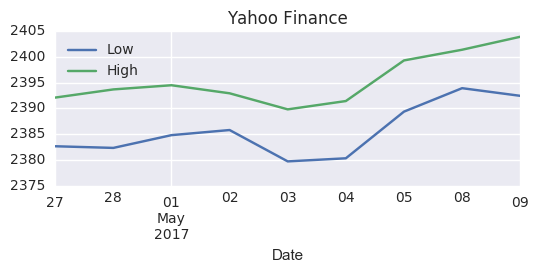

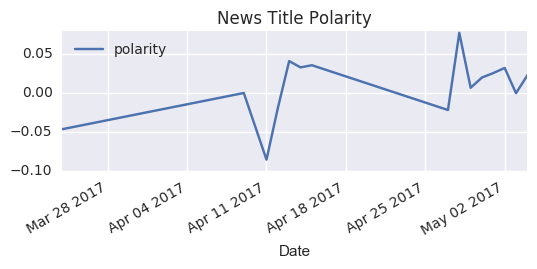

In [125]:
yahoo.plot(x="Date",figsize=(6, 2),title='Yahoo Finance')
data.plot(x='Date',figsize=(6, 2),title='News Title Polarity')

###  Estimate correlation between polarity scores and S&P500 index

In [126]:
import numpy
low=result['Low']
high=result['High']
polarity=result['polarity']
numpy.corrcoef(low, polarity) 
#from the data we have, we can conclude that news polarity and S&P500 index are positively correlated 

array([[ 1.        ,  0.21469213],
       [ 0.21469213,  1.        ]])

In [127]:
numpy.corrcoef(high, polarity)

array([[ 1.        ,  0.54956514],
       [ 0.54956514,  1.        ]])

In [128]:
numpy.corrcoef(high, low)

array([[ 1.        ,  0.77905387],
       [ 0.77905387,  1.        ]])

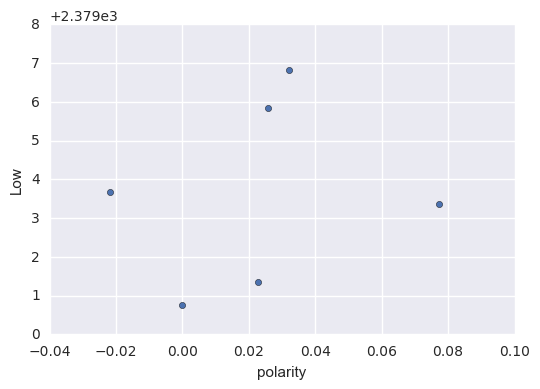

In [129]:
#a scatterplot for news polarity and Yahoo daily return of the market index
result.plot.scatter(x="polarity", y="Low")


### A parametic estimation for Yahoo daily return by news polarity

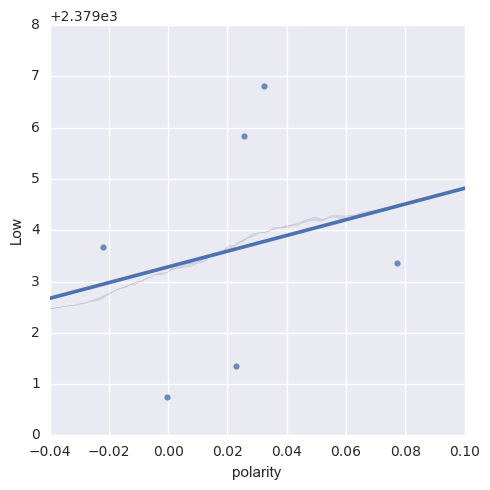

In [130]:
#a parametic estimation for Yahoo daily return by news polarity
import seaborn as sns
#lmplot plots the data with the regression coefficient through it.
sns.lmplot(x="polarity", y="Low", data=result, ci=0.95) #ci stands for confidence interval 

### A non-parametic estimation for Yahoo daily return by news polarity

In [131]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods

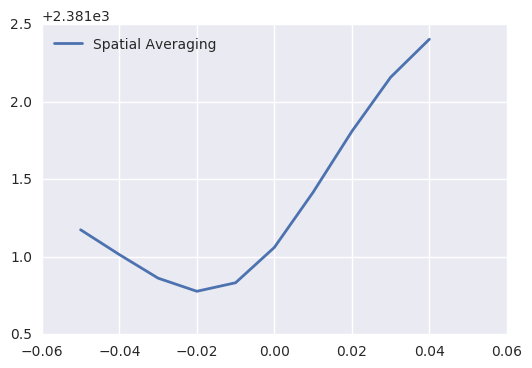

In [132]:
k0 = smooth.NonParamRegression(polarity, low, method=npr_methods.SpatialAverage())
k0.fit()
grid = np.r_[-0.05:0.05:0.01]
plt.plot(grid, k0(grid), label="Spatial Averaging", linewidth=2)
plt.legend(loc='best')